In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [5]:
features = extract_features('google_image_search/mslogo1.jpeg', model)
print(len(features))

100352


In [3]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [4]:
# path to the datasets
root_dir = 'combined_tmjournal_client/'
filenames = sorted(get_file_list(root_dir))
print(filenames)

['combined_tmjournal_client/1002966.png', 'combined_tmjournal_client/1006350.png', 'combined_tmjournal_client/1006351.png', 'combined_tmjournal_client/1021648.png', 'combined_tmjournal_client/1024036.png', 'combined_tmjournal_client/1053957.png', 'combined_tmjournal_client/1057980.png', 'combined_tmjournal_client/1062386.png', 'combined_tmjournal_client/1077233.png', 'combined_tmjournal_client/1085394.png', 'combined_tmjournal_client/1090696.png', 'combined_tmjournal_client/1096863.png', 'combined_tmjournal_client/1099688.png', 'combined_tmjournal_client/1100554.png', 'combined_tmjournal_client/1227607.png', 'combined_tmjournal_client/1235259.png', 'combined_tmjournal_client/1250365.png', 'combined_tmjournal_client/1351040.png', 'combined_tmjournal_client/1356095.png', 'combined_tmjournal_client/1356096.png', 'combined_tmjournal_client/1376374.png', 'combined_tmjournal_client/1391288.png', 'combined_tmjournal_client/1409391.png', 'combined_tmjournal_client/1419139.png', 'combined_tmjou

In [5]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

<ipython-input-5-21d73bc1ed80>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(filenames))):


In [6]:
pickle.dump(feature_list, open('google_image_search/data/features-combined_tmjournal-resnet.pickle', 'wb'))
pickle.dump(filenames, open('google_image_search/data/filenames-combined_tmjournal.pickle','wb'))

In [105]:
## Similarity search

feature_list = pickle.load(open('google_image_search/data/features-mslogo-resnet.pickle', 'rb'))
filenames = pickle.load(open('google_image_search/data/filenames-mslogo.pickle', 'rb'))

In [121]:
filenames

['google_image_search/hathway1.png',
 'google_image_search/hathway2.png',
 'google_image_search/hathway3.png',
 'google_image_search/hathway4.png',
 'google_image_search/hathway5.jpeg',
 'google_image_search/hathway6.png',
 'google_image_search/hathway7.jpeg',
 'google_image_search/hero1.jpeg',
 'google_image_search/hero2.png',
 'google_image_search/hero4.jpeg',
 'google_image_search/hero5.jpeg',
 'google_image_search/hero6.png',
 'google_image_search/honda1.png',
 'google_image_search/mslogo1.jpeg',
 'google_image_search/mslogo10.jpeg',
 'google_image_search/mslogo11.jpeg',
 'google_image_search/mslogo1_180degree_rotation copy.jpeg',
 'google_image_search/mslogo1_90degree_rotation.jpeg',
 'google_image_search/mslogo2.png',
 'google_image_search/mslogo3.png',
 'google_image_search/mslogo4.jpeg',
 'google_image_search/mslogo5.jpeg',
 'google_image_search/mslogo6.jpeg',
 'google_image_search/mslogo7.jpeg',
 'google_image_search/mslogo8.png',
 'google_image_search/mslogo9.png',
 'google_i

In [1]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='cosine').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[-3]])

NameError: name 'feature_list' is not defined

In [131]:
print(distances)
print(indices)
print(indices.shape)


[[0.         0.5407646  0.6151399  0.65024734 0.66039866]]
[[53 47 45 59 43]]
(1, 5)


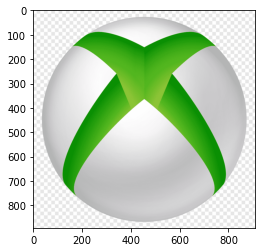

In [128]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))

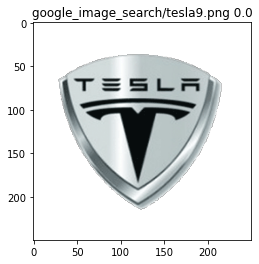

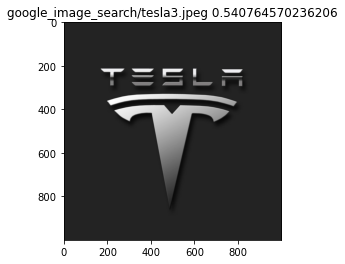

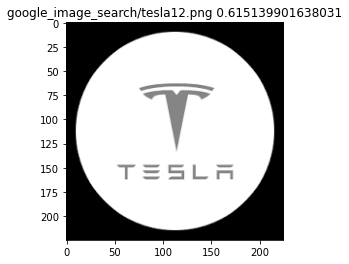

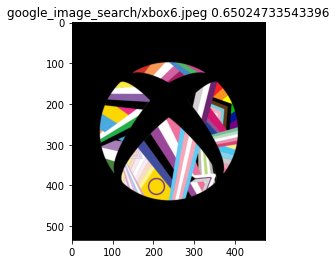

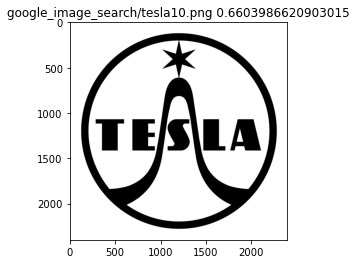

In [135]:
def process(i):
#     print(i)
#     plt.imshow(mpimg.imread(filenames[indices[0][i]]))
    filename = filenames[indices[0][i]]
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.title('{} {}'.format(filename,distances[0][i]))
    plt.imshow(image)

for i in range(0,indices.shape[1]): 
    process(i)

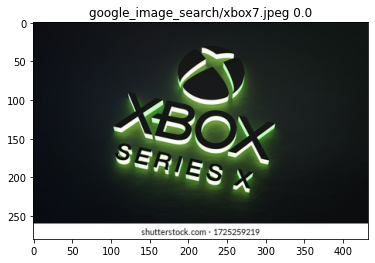

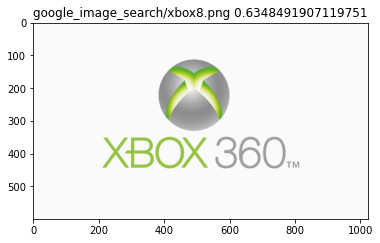

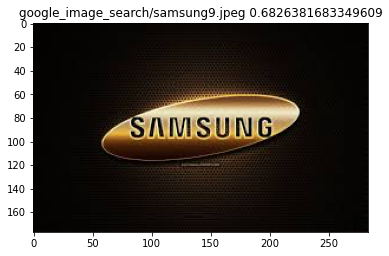

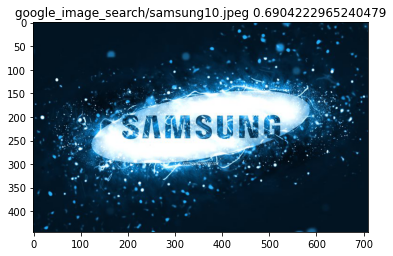

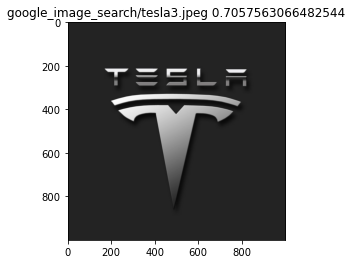

In [184]:
def process(i):
#     print(i)
#     plt.imshow(mpimg.imread(filenames[indices[0][i]]))
    filename = filenames[indices[0][i]]
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.title('{} {}'.format(filename,distances[0][i]))
    plt.imshow(image)

for i in range(0,indices.shape[1]): 
    process(i)

## For Microsoft Logo

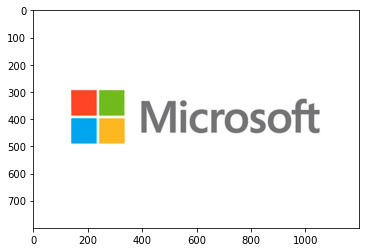

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(filenames[0]))

In [50]:
# distances of each image in the directory from our queried image
for i in range(5):
    print(distances[0][i])

6.143906e-08
0.6702629
0.79184866
0.84925073
0.9742111


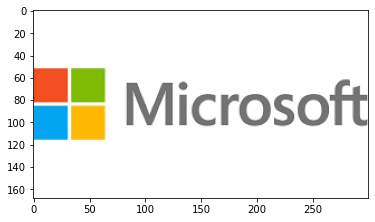

In [51]:
### First Neighbour
plt.imshow(mpimg.imread(filenames[indices[0][1]]))


In [52]:
filenames

['google_image_search/mslogo1.jpeg',
 'google_image_search/mslogo1_180degree_rotation copy.jpeg',
 'google_image_search/mslogo1_90degree_rotation.jpeg',
 'google_image_search/mslogo2.png',
 'google_image_search/mslogo3.png',
 'google_image_search/mslogo4.jpeg',
 'google_image_search/mslogo5.jpeg',
 'google_image_search/mslogo6.jpeg',
 'google_image_search/mslogo7.jpeg',
 'google_image_search/mslogo8.png',
 'google_image_search/mslogo9.png']

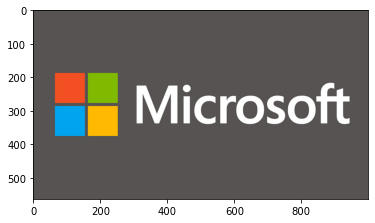

In [53]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]))


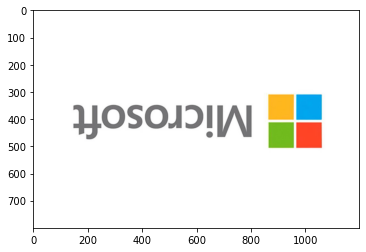

In [54]:
plt.imshow(mpimg.imread(filenames[indices[0][3]]))


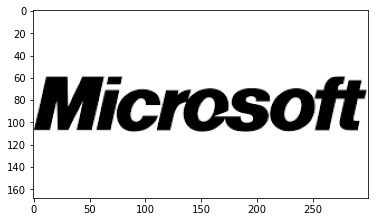

In [55]:
plt.imshow(mpimg.imread(filenames[indices[0][4]]))


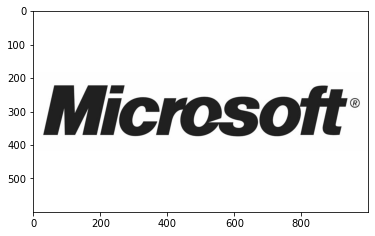

In [56]:
plt.imshow(mpimg.imread(filenames[indices[0][5]]))


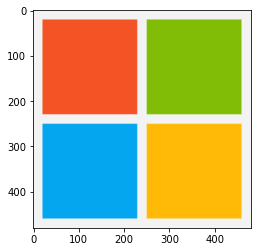

In [57]:
plt.imshow(mpimg.imread(filenames[indices[0][6]]))


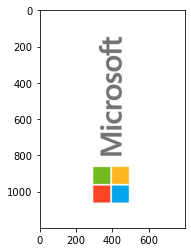

In [58]:
plt.imshow(mpimg.imread(filenames[indices[0][7]]))


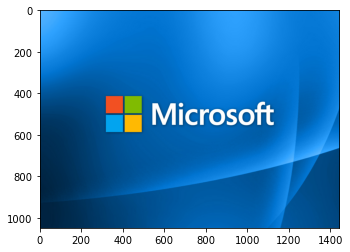

In [59]:
plt.imshow(mpimg.imread(filenames[indices[0][8]]))


In [99]:
def plot_images(similar_image_paths,distances):
    # Show subplots | shape: (1,3) 
        fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
        for i, ax in enumerate(axs.flatten()):
            plt.sca(ax)
            plt.imshow(mpimg.imread(similar_image_paths[i]), cmap=plt.cm.jet)
            #plt.colorbar()
            plt.title('Image: {}'.format(similar_image_paths[i]))

            #plt.tight_layout()
        plt.suptitle('Overall Title')
        plt.show()

In [90]:
num_images  = len(filenames)

0
['google_image_search/mslogo1.jpeg', 'google_image_search/mslogo2.png', 'google_image_search/mslogo4.jpeg', 'google_image_search/mslogo1_180degree_rotation copy.jpeg']
[6.1439060e-08 6.7026287e-01 7.9184866e-01 8.4925073e-01 9.7421110e-01]


IndexError: list index out of range

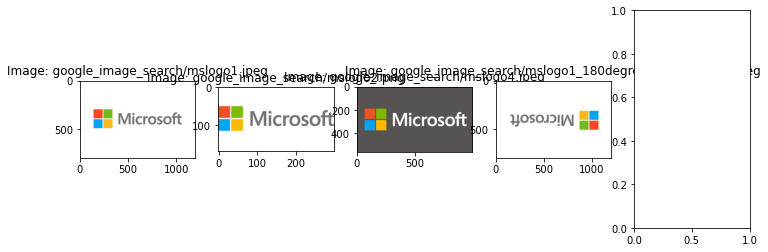

In [101]:
import random

for i in range(2):
    random_image_index = i
    print(random_image_index)
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]],n_neighbors=5)
    # don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] +[filenames[indices[0][i]] for i in range(1,4)]
    print(similar_image_paths)
    print(distances[0])
    plot_images(similar_image_paths, distances[0])

In [75]:
len(feature_list)

11

In [95]:
axs

array([<AxesSubplot:title={'center':'Image: 1'}>,
       <AxesSubplot:title={'center':'Image: 2'}>,
       <AxesSubplot:title={'center':'Image: 3'}>], dtype=object)

## Different aspects of image similarity
- shapes inside logo
- 0 to 360 degree rotation
- mirroring
- text ka font ,size change ho 
- trade dress: color scheme,text arrangement,font size
    

### Histogram Intersection Algorithm

#### It will work well only when we can remove background from images(My assumption)
#### So possibly extract objects and then run histogram intersection algorithm  
#### Research paper : http://stephenwestland.co.uk/pdf/lee_xin_westland_CR&A_2005.pdf

In [140]:
## using deepgaze library
!git clone https://github.com/mpatacchiola/deepgaze.git

Cloning into 'deepgaze'...
remote: Enumerating objects: 1324, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 1324 (delta 41), reused 53 (delta 20), pack-reused 1235
Receiving objects: 100% (1324/1324), 239.18 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (722/722), done.
Updating files: 100% (170/170), done.


In [147]:
!cd deepgaze/ && git checkout 2.0 && python3 setup.py install

Already on '2.0'
Your branch is up to date with 'origin/2.0'.
/Users/Rahulthakur/opt/anaconda3/lib/python3.8/distutils/dist.py:274: UserWarning: Unknown distribution option: 'include_package_data'
  warnings.warn(msg)
running install
running build
running build_py
creating build
creating build/lib
creating build/lib/deepgaze
copying deepgaze/load_model.py -> build/lib/deepgaze
copying deepgaze/haar_cascade.py -> build/lib/deepgaze
copying deepgaze/cnn_head_pose_estimator.py -> build/lib/deepgaze
copying deepgaze/bayes_filter.py -> build/lib/deepgaze
copying deepgaze/saliency_map.py -> build/lib/deepgaze
copying deepgaze/__init__.py -> build/lib/deepgaze
copying deepgaze/color_classification.py -> build/lib/deepgaze
copying deepgaze/face_landmark_detection.py -> build/lib/deepgaze
copying deepgaze/head_pose_estimation.py -> build/lib/deepgaze
copying deepgaze/face_detection.py -> build/lib/deepgaze
copying deepgaze/motion_detection.py -> build/lib/deepgaze
copying deepgaze/color_detecti

In [254]:
histogram_classifier = HistogramColorClassifier(channels=[0, 1, 2], 
                                         hist_size=[128, 128, 128], 
                                         hist_range=[0, 256, 0, 256, 0, 256], 
                                         hist_type='BGR')
def histogram_intersection(target_image,image_list):
    """
    Returns the list of images and their similarity from target image
    
    """
    histogram_classifier = HistogramColorClassifier(channels=[0, 1, 2], 
                                         hist_size=[128, 128, 128], 
                                         hist_range=[0, 256, 0, 256, 0, 256], 
                                         hist_type='BGR')
    
    for image in image_list:
        print(image)
        image_model = cv2.imread(image)
        plt.imshow(mpimg.image_model)
        
        print(image_model.shape)
        image_model_2 = cv2.resize(image_model, (224,224))
        print(image_model_2.shape)
        histogram_classifier.addModelHistogram(image_model_2)
        
    comparison_array = histogram_classifier.returnHistogramComparisonArray(image, 
                                                                method="intersection")
    
    return dict(zip(image_list,list(comparison_array)))

In [255]:
histogram_intersection(filenames[2],filenames[:5])

google_image_search/hathway1.png


AttributeError: module 'matplotlib.image' has no attribute 'image_model'

In [243]:
import cv2
import numpy as np
from deepgaze.color_classification import HistogramColorClassifier

my_classifier = HistogramColorClassifier(channels=[0, 1, 2], 
                                         hist_size=[128, 128, 128], 
                                         hist_range=[0, 256, 0, 256, 0, 256], 
                                         hist_type='BGR')

In [244]:
image_list = [filenames[0],filenames[1],filenames[2],filenames[3],filenames[4]]
## filenames[3],filenames[4],filenames[5],filenames[7],filenames[13]
base_file = filenames[2]

In [245]:
model_1 = cv2.imread(filenames[0]) 
my_classifier.addModelHistogram(model_1)

model_2 = cv2.imread(filenames[1]) 
my_classifier.addModelHistogram(model_2)

model_3 = cv2.imread(filenames[2]) 
my_classifier.addModelHistogram(model_3)

model_4 = cv2.imread(filenames[3]) 
my_classifier.addModelHistogram(model_4)

model_5 = cv2.imread(filenames[4]) 
my_classifier.addModelHistogram(model_5)

# model_6 = cv2.imread(filenames[3]) 
# model_7 = cv2.imread(filenames[4])
# model_8 = cv2.imread(filenames[5]) 
# model_9 = cv2.imread(filenames[7])
# model_10 = cv2.imread(filenames[13])

# my_classifier.addModelHistogram(model_6)
# my_classifier.addModelHistogram(model_7)
# my_classifier.addModelHistogram(model_8)
# my_classifier.addModelHistogram(model_9)
# my_classifier.addModelHistogram(model_10)

In [246]:
image = cv2.imread(filenames[2])
comparison_array = my_classifier.returnHistogramComparisonArray(image, 
                                                                method="intersection")

In [247]:
list(comparison_array)

[8.556703687645495e-05, 0.0, 1.1478265638124867, 0.0, 0.0]

In [248]:
probability_array = comparison_array / np.sum(comparison_array)


In [249]:
probability_array

array([7.45414519e-05, 0.00000000e+00, 9.99925459e-01, 0.00000000e+00,
       0.00000000e+00])

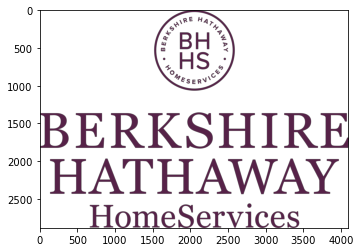

In [162]:
plt.imshow(mpimg.imread(filenames[2]))


In [174]:
import matplotlib.pyplot as plt

In [191]:
def display_image(image_name,i):
#     plt.imshow(mpimg.imread(image_name))
#     image = mpimg.imread(image_name)
#     # <something gets done here>
    plt.figure()
    plt.title('{} {}'.format(image_name,probability_array[i]))
    plt.imshow(mpimg.imread(image_name))



0 google_image_search/hathway1.png
1 google_image_search/hathway2.png
2 google_image_search/hathway7.jpeg
3 google_image_search/xbox9.png
4 google_image_search/hero6.png


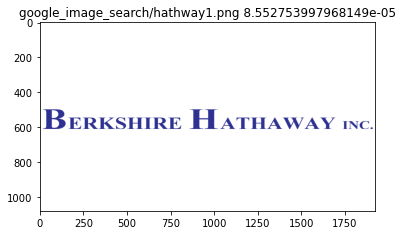

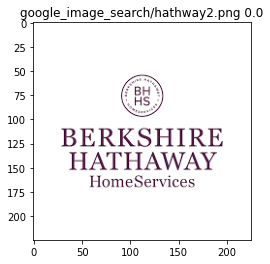

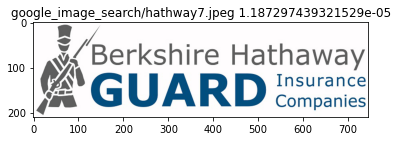

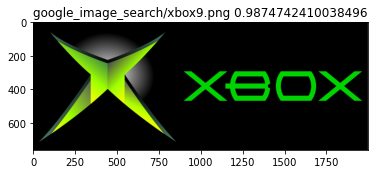

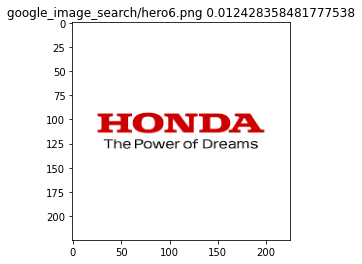

In [192]:
for i,image_name in enumerate(image_list):
    print(i,image_name)        
    display_image(image_name,i)